![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Customer Analysis Round 7
##### Isidre Munné-Bertran

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

### Coding Best Practices

In [1]:
# Firstly,libraries:

import pandas as pd # data manipulation and analysis.
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # plots visualizations
import seaborn as sns # HD plots graphics based on matplot
import scipy.stats as stats # statistical functions
from sklearn.preprocessing import OneHotEncoder # oneHotEncoder
from sklearn.preprocessing import MinMaxScaler # To normalize the data
from sklearn.model_selection import train_test_split
from sklearn import linear_model # Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # test the Machine Learning model
import warnings # Lastly... no more warnings... HURRAY !!!!
warnings.filterwarnings('ignore')

In [2]:
# Defining our functions:

def explore_data():
    print("The dataframe shape is", data.shape, ".")
    print(" ")
    print("The dataframe columns are:")
    print(data.columns)
    print(" ")
    print("The dataframe data types are:")
    print(data.dtypes)

def cc(): # cleaning columns
    data.columns = cc = [column.lower().replace(' ', '_') for column in data] # standarizing the columns
    print(data.columns)
    print()

### Reading the Data

Let's start by opening the three dataframe and then continue with data exploration.

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv') # Opening the Data

### Exploring the Data

In [4]:
explore_data() # First impression of our data

The dataframe shape is (9134, 24) .
 
The dataframe columns are:
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
 
The dataframe data types are:
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                       

This dataset has `9134` costumers data and `24` columns. The target column for our analysis will be `Customer Lifetime Value`.
Useful features for our analysis would be **costumer demographics** `State`, `Gender`, `Education`, `EmploymentStatus` and `Income`.

In [5]:
## We will check now our dataset to see any NaN value our anything that could lead to unnecessary errors.
data.sample(10) # Let's explore now a random sample

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8823,WN56695,California,8607.482071,No,Premium,College,2/11/11,Unemployed,M,0,...,52,0,7,Personal Auto,Personal L2,Offer1,Web,566.400000,Four-Door Car,Medsize
2862,EC18611,Nevada,3402.394420,No,Extended,High School or Below,2/16/11,Unemployed,M,0,...,20,0,1,Personal Auto,Personal L2,Offer1,Agent,475.200000,Two-Door Car,Medsize
8302,CU10179,California,5263.921634,No,Extended,College,1/14/11,Employed,F,82528,...,65,0,1,Personal Auto,Personal L1,Offer2,Agent,258.036918,Sports Car,Small
6318,ML93514,California,4737.841289,No,Premium,Bachelor,1/14/11,Employed,M,63977,...,78,0,1,Personal Auto,Personal L3,Offer1,Agent,32.830590,Four-Door Car,Medsize
7969,TR39403,California,3681.978995,No,Extended,Master,1/31/11,Employed,F,77951,...,46,3,1,Corporate Auto,Corporate L2,Offer4,Branch,19.668633,Two-Door Car,Medsize
4475,ED90879,Nevada,7325.917302,No,Premium,Bachelor,1/18/11,Employed,M,20757,...,74,3,9,Corporate Auto,Corporate L3,Offer1,Agent,216.426800,Four-Door Car,Medsize
3159,YK93229,Oregon,3260.744760,No,Extended,High School or Below,1/18/11,Unemployed,M,0,...,33,0,1,Personal Auto,Personal L3,Offer2,Call Center,432.000000,Two-Door Car,Medsize
6639,LV44800,California,3056.990764,No,Extended,High School or Below,1/7/11,Employed,F,78310,...,24,0,1,Personal Auto,Personal L2,Offer3,Branch,364.800000,Four-Door Car,Medsize
7213,HY46017,California,2776.772734,No,Basic,College,2/26/11,Employed,F,70793,...,1,0,1,Personal Auto,Personal L3,Offer2,Web,62.625841,Four-Door Car,Large
5575,WC83676,Nevada,2801.562831,No,Basic,College,2/18/11,Employed,M,33247,...,47,0,1,Special Auto,Special L3,Offer2,Web,284.956298,Four-Door Car,Medsize


So, the `Customer` column can be dropeed, since it only contains information about specific costumers IDs and we don't need that.
Also, `Effective to Date` does not add any useful information in this case.

### Cleaning the Data

In [6]:
cc()

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')



In [7]:
# Before doing the split, we will drop the "customer" column (it only have ID's) and "effective_to_date"
data_test = data.copy()
data_test = data_test.drop(["customer","effective_to_date"], axis = 1)
data_test.sample(5)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
2683,Arizona,5332.462694,Yes,Basic,Doctor,Employed,F,68931,Urban,Married,...,30,0,7,Personal Auto,Personal L2,Offer2,Branch,309.577946,Four-Door Car,Medsize
7926,Washington,2589.430030,No,Basic,High School or Below,Employed,F,49675,Suburban,Married,...,54,0,1,Personal Auto,Personal L2,Offer2,Agent,312.000000,Two-Door Car,Medsize
7933,California,7172.070153,No,Basic,High School or Below,Employed,F,73836,Urban,Married,...,35,3,1,Personal Auto,Personal L3,Offer1,Branch,553.385695,Luxury Car,Medsize
2966,Oregon,8427.723769,No,Basic,Bachelor,Employed,M,20662,Suburban,Married,...,99,0,2,Personal Auto,Personal L1,Offer4,Agent,373.324673,Two-Door Car,Medsize
6510,Oregon,3339.299496,No,Extended,Bachelor,Employed,F,38821,Suburban,Single,...,64,0,1,Personal Auto,Personal L3,Offer1,Agent,488.842320,Two-Door Car,Small


In [8]:
print("The following columns are numerical")
X_num = data_test.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(X_num.columns)
print()
print("The following columns are categorical")
X_cat = data_test.select_dtypes(exclude=np.number).fillna("")
print(X_cat.columns)

data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
1148,SG32258,Arizona,2416.542359,No,Basic,College,2/6/11,Medical Leave,F,18944,...,64,0,1,Personal Auto,Personal L3,Offer4,Call Center,125.274351,Four-Door Car,Medsize
3826,BO94261,Arizona,7550.867469,No,Basic,Doctor,1/20/11,Unemployed,M,0,...,15,1,2,Personal Auto,Personal L1,Offer2,Call Center,100.212651,Four-Door Car,Medsize
7563,DP23630,California,7411.813055,No,Basic,High School or Below,2/22/11,Unemployed,M,0,...,19,0,2,Personal Auto,Personal L3,Offer1,Agent,525.600000,Four-Door Car,Large
8538,YU23754,California,5193.770572,No,Basic,Master,1/16/11,Employed,F,24948,...,51,0,4,Personal Auto,Personal L3,Offer2,Branch,280.352767,Four-Door Car,Medsize
4669,UI80897,Washington,5552.596353,No,Basic,High School or Below,2/27/11,Employed,M,50470,...,87,0,8,Corporate Auto,Corporate L2,Offer4,Call Center,377.498287,Two-Door Car,Large
2704,MR60878,Oregon,15762.531980,No,Basic,Bachelor,2/15/11,Employed,F,44362,...,75,0,2,Corporate Auto,Corporate L3,Offer2,Call Center,142.113373,Four-Door Car,Small
760,EA25683,Washington,7778.532347,No,Basic,High School or Below,1/7/11,Employed,M,63786,...,81,0,1,Corporate Auto,Corporate L3,Offer1,Branch,798.002689,Luxury SUV,Medsize
8066,OX62816,Washington,5167.357134,No,Basic,Master,1/23/11,Employed,M,30376,...,16,0,6,Personal Auto,Personal L1,Offer1,Web,316.800000,Four-Door Car,Small
8835,HK40573,California,14382.564630,No,Extended,College,1/8/11,Employed,M,52174,...,25,0,2,Personal Auto,Personal L2,Offer1,Call Center,403.737293,SUV,Medsize
3336,UM14135,Nevada,3265.156348,Yes,Extended,Bachelor,1/26/11,Employed,F,25820,...,69,0,1,Personal Auto,Personal L1,Offer1,Agent,393.600000,Four-Door Car,Medsize


### Processing the Data
AKA. Transformations

### X-Y split

In [9]:
Y = data_test['total_claim_amount'] # We store the target of our analysis in Y
X = data_test.drop(['total_claim_amount'], axis=1) # And then, we store all features in X (excluding the target)

### As best practicse, it is not recommended to do transformations to the target

### Normalize
* We don't use the normalizer (it will normalize rows, not the columns)
* Instead, we will use MinMaxScaler

In [10]:
transformer = MinMaxScaler().fit(X_num) # We use it to normalize
x_minmax = transformer.transform(X_num)
print("X_MinMax Shape is:", x_minmax.shape)

X_MinMax Shape is: (9134, 8)


In [11]:
# We convert it to a DataFrame
num_norm = pd.DataFrame(x_minmax, columns=X_num.columns) # Selecting x_num.columns for our columns
num_norm.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
7432,0.068462,0.443934,0.151899,0.171429,0.313131,0.0,0.750,0.160898
4182,0.042012,0.251388,0.025316,0.085714,0.000000,0.0,0.625,0.111125
6699,0.067990,0.490663,0.008439,0.457143,0.525253,0.0,0.125,0.010203
4161,0.082419,0.791050,0.194093,0.057143,0.747475,0.0,0.250,0.099871
136,0.094812,0.805513,0.244726,0.142857,0.838384,0.0,0.250,0.018561


### Preprocessing

#### One-Hot Encoding with Get_dummies

In [12]:
X_dumm = pd.get_dummies(X_cat, drop_first=False) # You can put X, not separating variables is needed.
X_dumm

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


#### Concat

In [13]:
# Concat (One-Hot encoder)
X_concat = pd.concat([X_num, X_dumm], axis=1)
X_concat.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
3052,2279.747148,0,64,9,95,0,1,460.800000,1,0,...,0,1,0,0,0,0,0,0,1,0
447,8260.639809,33321,105,6,2,0,3,504.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
8463,2506.360995,0,73,8,19,0,1,525.600000,1,0,...,1,1,0,0,0,0,0,0,0,1
106,7694.064293,32303,65,13,34,0,2,45.152521,0,1,...,0,1,0,0,0,0,0,0,1,0
7536,6731.050335,0,62,0,5,0,2,446.400000,0,0,...,0,1,0,0,0,0,0,0,1,0


### Linear Regression

#### Train-Test Split

In [14]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_dumm, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [15]:
len(X_dumm)*0.7 # Len before the test

6393.799999999999

In [16]:
len(X_test) # Len after the test

2741

#### Applying Linear Regression

In [17]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

### Model Validation

In [18]:
predictions = model.predict(X_test)

In [19]:
predictions # An array of predictions

array([214.5, 432.5, 437.5, ..., 657. ,  99. , 582. ])

In [20]:
y_test # An arrawy of the data from our target

708     218.598065
47      447.793440
3995    451.200000
1513    355.641958
3686    470.097411
           ...    
4271    518.400000
7923    650.521790
5633    652.800000
8432    150.878447
681     452.616872
Name: total_claim_amount, Length: 2741, dtype: float64

#### r2, RMSE and MSE

In [21]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.7435590457853245, 144.68717964478077, 20934.37995356106)

In [22]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

# ~ Ty Andre for this ! #https://stackoverflow.com/questions/51023806/how-to-get-adjusted-r-square-for-linear-regression
adj_r2 = (1 - (1 - r2) * ((X_concat.shape[0] - 1) / 
          (X_concat.shape[0] - X_concat.shape[1] - 1)))
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("Adj r2 = ", adj_r2)

r2 =  0.7435590457853245
RMSE =  144.68717964478077
MSE =  20934.37995356106
Adj r2 =  0.7417208607363661


In [23]:
# r2 = Kind of good, it is closer to 1
# RMSE = It's 114. We will compare it with our target:
data['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [24]:
data_trans = data.copy()
y_test2 = y_test.copy()

def boxcox_transform(data_trans):
    numeric_cols = data_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in data
        data_trans[column] = np.where(data_trans[column]<=0, np.NAN, data_trans[column]) 
        data_trans[column] = data_trans[column].fillna(data_trans[column].mean())
        transformed_data, ci = stats.boxcox(data_trans[column])
        data_trans[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci
data, _ci = boxcox_transform(data_trans)
data_trans.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2/24/11,Employed,F,1247.937066,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,1/31/11,Unemployed,F,1167.961720,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2/19/11,Employed,F,1144.063081,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,1/20/11,Unemployed,M,1167.961720,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2/3/11,Employed,M,1072.375744,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize


In [25]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [26]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test2, _ci['total_claim_amount'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

results.sort_values('diff', ascending=False).head(50)

,true,pred,diff
5074,4.000409e+06,1.111931e+06,2.888478e+06
9049,3.116596e+06,7.911054e+05,2.325491e+06
248,2.834480e+06,7.982957e+05,2.036184e+06
1626,2.478386e+06,7.620478e+05,1.716338e+06
8275,1.993026e+06,3.875611e+05,1.605465e+06
7136,1.940622e+06,5.319953e+05,1.408627e+06
7457,2.347413e+06,9.753787e+05,1.372035e+06
6516,1.965085e+06,7.787666e+05,1.186318e+06
1383,1.949932e+06,8.015754e+05,1.148356e+06
8851,1.477622e+06,4.509288e+05,1.026693e+06


<AxesSubplot:xlabel='true', ylabel='pred'>

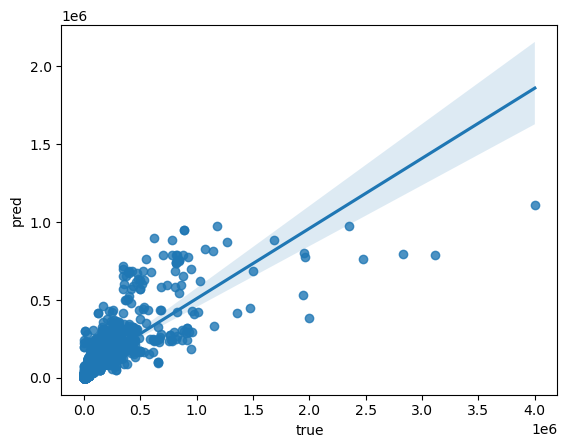

In [27]:
sns.regplot(results['true'], results['pred'])

In [28]:
results.sort_values('diff', ascending=True).head(50)

,true,pred,diff
1328,3.459721,2.268613,1.191108
6255,757.704291,748.508437,9.195855
1414,31.892632,17.230064,14.662568
2166,866.867848,850.874633,15.993215
2291,13043.533911,13012.570195,30.963716
2574,58749.597217,58794.308330,44.711113
8442,4135.088876,4081.429724,53.659152
1745,400.824359,456.837535,56.013176
1430,52443.606668,52381.411531,62.195137
982,9.828160,73.707762,63.879602


In [29]:
# We have more accuaracy with low numbers, we can solve it futher removing outliers from our data

In [42]:
data_trans2 = data_test.copy()

def boxcox_transform(data_trans2):
    numeric_cols = data_trans2.select_dtypes(np.number).columns
    _ci2 = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in data
        data_trans2[column] = np.where(data_trans2[column]<=0, np.NAN, data_trans2[column]) 
        data_trans2[column] = data_trans2[column].fillna(data_trans2[column].mean())
        transformed_data, ci2 = stats.boxcox(data_trans2[column])
        data_trans2[column] = transformed_data
        _ci2[column] = [ci2] 
    return data, _ci2
data, _ci2 = boxcox_transform(data_trans2)
data_trans2.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2.703839,No,Basic,Bachelor,Employed,F,1247.937066,Suburban,Married,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,Arizona,2.754926,No,Extended,Bachelor,Unemployed,F,1167.961720,Suburban,Single,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,Nevada,2.780772,No,Premium,Bachelor,Employed,F,1144.063081,Suburban,Married,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,California,2.759125,No,Basic,Bachelor,Unemployed,M,1167.961720,Suburban,Married,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,Washington,2.704995,No,Basic,Bachelor,Employed,M,1072.375744,Rural,Single,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize


In [44]:
Y2 = data_trans2['total_claim_amount'] # We store the target of our analysis in Y
X2 = data_trans2.drop(['total_claim_amount'], axis=1) # And then, we store all features in X (excluding the target)

### As best practicse, it is not recommended to do transformations to the target

In [45]:
print("The following columns are numerical")
X_num2 = data_trans.select_dtypes(include= np.number).fillna(0) # We also deal with NaN values
print(X_num.columns)
print()
print("The following columns are categorical")
X_cat2 = data_trans2.select_dtypes(exclude=np.number).fillna("")
print(X_cat.columns)

data.sample(10) # we print a larger sample to see the changes, checking for NaN values or any other error

The following columns are numerical
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

The following columns are categorical
Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
9070,JC29850,California,7506.964816,No,Basic,Bachelor,1/26/11,Unemployed,M,0,...,12,1,2,Corporate Auto,Corporate L3,Offer1,Call Center,321.600000,Two-Door Car,Medsize
6354,CS30372,Oregon,5420.339434,No,Basic,Bachelor,2/23/11,Employed,M,21881,...,27,0,5,Corporate Auto,Corporate L3,Offer3,Agent,133.099001,Four-Door Car,Medsize
6713,GM48223,Oregon,5461.967787,No,Basic,Bachelor,2/6/11,Employed,F,42650,...,92,0,5,Personal Auto,Personal L1,Offer3,Agent,35.565605,Four-Door Car,Medsize
3398,GP56044,Washington,27440.611010,No,Extended,High School or Below,1/22/11,Employed,M,84306,...,37,0,2,Personal Auto,Personal L3,Offer2,Agent,863.413385,SUV,Large
4263,VZ70667,Oregon,14206.980910,No,Basic,College,1/14/11,Disabled,F,26056,...,73,0,2,Personal Auto,Personal L3,Offer1,Branch,355.558088,Four-Door Car,Medsize
3945,KX18446,Washington,6689.022728,Yes,Extended,High School or Below,2/13/11,Employed,M,56980,...,70,0,7,Corporate Auto,Corporate L2,Offer2,Agent,599.000883,Two-Door Car,Medsize
5455,BG95711,California,16477.477990,No,Extended,College,2/22/11,Employed,F,57264,...,30,1,2,Personal Auto,Personal L3,Offer1,Branch,129.249842,Four-Door Car,Medsize
7328,IJ83011,California,16350.130610,No,Premium,College,1/28/11,Unemployed,M,0,...,82,1,2,Corporate Auto,Corporate L2,Offer1,Call Center,1452.213743,SUV,Medsize
5189,YU90693,California,2481.842224,No,Basic,High School or Below,1/13/11,Employed,F,77993,...,10,0,1,Personal Auto,Personal L1,Offer2,Agent,297.600000,Four-Door Car,Medsize
4230,VE51810,Arizona,5813.242121,No,Basic,Bachelor,1/20/11,Employed,M,42795,...,38,0,4,Personal Auto,Personal L1,Offer3,Branch,350.400000,Four-Door Car,Large


In [58]:
# Concat (One-Hot encoder)
X_concat2 = pd.concat([X_num2, X_dumm2], axis=1)
X_concat.sample(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
767,12280.766610,88340,102,16,1,0,2,489.600000,0,1,...,0,0,0,0,0,0,1,0,1,0
4272,4832.117309,0,139,6,9,0,1,1000.800000,0,1,...,0,0,0,0,1,0,0,0,1,0
7535,4314.065657,0,64,16,42,1,5,460.800000,0,0,...,0,1,0,0,0,0,0,0,0,1
4807,6162.369756,0,89,4,24,0,4,941.347502,0,0,...,0,1,0,0,0,0,0,0,1,0
5786,7475.784971,29633,196,26,57,0,1,534.653787,0,0,...,0,0,1,0,0,0,0,0,1,0


<AxesSubplot:xlabel='customer_lifetime_value'>

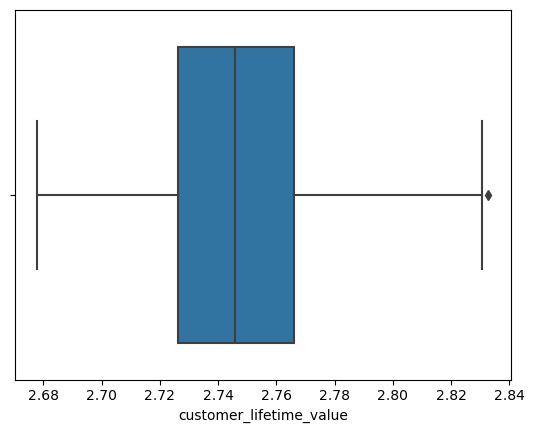

In [71]:
# How to remove the Outliers
sns.boxplot(x=X_concat2['customer_lifetime_value'], whis=1.66) # By default whis=1.5. We can change it to expand the range and remove outliers.

<AxesSubplot:xlabel='income'>

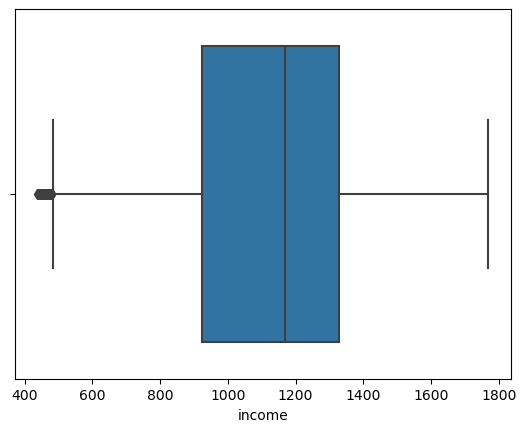

In [75]:
sns.boxplot(x=X_concat2['income'], whis=1.1) # By default whis=1.5. We can change it to expand the range and remove outliers.

In [46]:
X_dumm2 = pd.get_dummies(X_cat2, drop_first=False) # You can put X, not separating variables is needed.
X_dumm2

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_dumm2, Y2, test_size=0.3, random_state=42) 
model2 = LinearRegression() # We have the model
model2.fit(X_train2,y_train2) # We fit the training data into the model
predictions2 = model2.predict(X_test2)

In [51]:
r2_score(y_test2, predictions2), mean_squared_error(y_test2, predictions2, squared=False), mean_squared_error(y_test2, predictions2)

(0.8140417987138753, 5.01299555335669, 25.130124417973946)

In [53]:
results2 = pd.DataFrame()
results2['true'] = inv_boxcox(y_test2, _ci2['total_claim_amount'])
results2['pred'] = predictions
results2['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results2
results2.sort_values('diff', ascending=True).head(50)

,true,pred,diff
1328,1.687291,2.268613,1.191108
6255,46.278027,748.508437,9.195855
1414,8.737111,17.230064,14.662568
2166,49.451117,850.874633,15.993215
2291,183.207703,13012.570195,30.963716
2574,374.864662,58794.308330,44.711113
8442,105.662175,4081.429724,53.659152
1745,33.718553,456.837535,56.013176
1430,355.200000,52381.411531,62.195137
982,4.110585,73.707762,63.879602


<AxesSubplot:xlabel='true', ylabel='pred'>

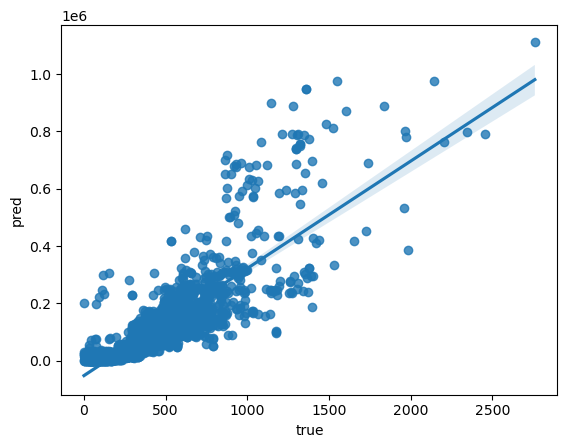

In [54]:
sns.regplot(results2['true'], results2['pred'])

In [55]:
r2_score(y_test2, predictions2), mean_squared_error(y_test2, predictions2, squared=False), mean_squared_error(y_test2, predictions2)

(0.8140417987138753, 5.01299555335669, 25.130124417973946)

In [56]:
r22 = r2_score(y_test2, predictions2)
RMSE2 = mean_squared_error(y_test2, predictions2, squared=False)
MSE2 = mean_squared_error(y_test2, predictions2)
MAE2 = mean_absolute_error(y_test2, predictions2)

print("r2 = ", r22)
print("RMSE = ", RMSE2)
print("MSE = ", MSE2)
print("MAE = ", MAE2)

r2 =  0.8140417987138753
RMSE =  5.01299555335669
MSE =  25.130124417973946
MAE =  3.7589961433740817
